<a href="https://colab.research.google.com/github/KelvinLam05/Binary-and-Multiclass-Text-Classification/blob/main/Review_Rating_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Goal of the project**

In this notebook, we will focus on the use of ML in predicting the ratings of user reviews.

**Data set information**

This dataset consists of a 1000 Amazon reviews, star ratings, for 4 latest (as of mid-2019) bluetooth earphone devices.

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import ktrain
import tensorflow as tf
from ktrain import text
from sklearn.model_selection import train_test_split

In [ ]:
# Load dataset
df = pd.read_csv('/content/amazon_earphones_reviews.csv')

Let’s see some of the rows in the data.


In [ ]:
# Examine the data
df.head()

,ReviewText,ReviewStar,Product
0,Right ear and Left ear audio ratio is not prop...,1,PTron Intunes
1,"The sound quality, bass, composure is just per...",5,PTron Intunes
2,"Sound quality is excellent, and this is my fir...",5,PTron Intunes
3,"good look but Sound Are to Bad ,And low ,noise...",2,PTron Intunes
4,Build of the central control is poor... Easily...,2,PTron Intunes


In [ ]:
# Overview of all variables, their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewText  1000 non-null   object
 1   ReviewStar  1000 non-null   int64 
 2   Product     1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


**Preprocessing**

In [ ]:
# Change pandas column names to lower case
df.columns = df.columns.str.lower()

Let’s see if there are any missing data.

In [ ]:
# Checking for missing values
df.isnull().sum().sort_values(ascending = False)

product       0
reviewstar    0
reviewtext    0
dtype: int64

Nice! No data is missing. Let’s see the number of unique ratings in the data.

In [ ]:
df['reviewstar'].unique()

array([1, 5, 2, 4, 3])

We have only 5 unique values of the variable reviewstar.

Let’s see the distribution of each class within the table.

In [ ]:
# Checking the distribution of classes
df['reviewstar'].value_counts() 

5    416
1    235
4    181
3     99
2     69
Name: reviewstar, dtype: int64

We can see that most ratings are 5-star ratings and the least are 2-star ratings. 

In [ ]:
# Find all unique characters and symbols 
all_text = str()

for sentence in df['reviewtext'].values:
    all_text += sentence
    
''.join(set(all_text))

'😇🙈😂P!😞त👍\n$T🤦👌😣iB1%b♂heMr️YaHj☹😡.G S46~😠🏻ZसFEop"(@5w\xa0syQ,L🎼+n7CW:/x🎧t😅A🎶ग’&I😍0*⚠k-3R2?d8NUu👎😊☺😎।\u200d\'ीV🤣❤💰₹zv😀f=9cXlJ;K)gD😆mqO😤ं'

The kind of data we get from customer feedback is usually unstructured. It contains unusual text and symbols that need to be cleaned so that a machine learning model can grasp it. 

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemma = WordNetLemmatizer()


We will now set up our cleaning function.

In [ ]:
def clean_review(review_text):
  
  # Removing all irrelevant characters (numbers and punctuation)
  review_text = re.sub('[^a-zA-Z]', ' ', review_text)                        
  # Convert all characters into lowercase
  review_text = str(review_text).lower()                                     
  # Tokenization
  review_text = word_tokenize(review_text)                                   
  # Removing Stopwords
  review_text = [item for item in review_text if item not in stop_words]     
  # Lemmatization
  review_text = [lemma.lemmatize(word = w, pos = 'v') for w in review_text] 
  # Remove the words having length <= 2
  review_text = [i for i in review_text if len(i) > 2]                       
  # Convert the list of tokens into back to the string
  review_text = ' '.join (review_text)                                       
  
  return review_text

In [ ]:
df['clean_review'] = df['reviewtext'].apply(clean_review)

In [ ]:
all_text = str()

for sentence in df['clean_review'].values:
    all_text += sentence
    
''.join(set(all_text))

'ajx tzvfcliogpkbwhmsydenqru'

In [ ]:
df['reviewtext'].head()

0    Right ear and Left ear audio ratio is not prop...
1    The sound quality, bass, composure is just per...
2    Sound quality is excellent, and this is my fir...
3    good look but Sound Are to Bad ,And low ,noise...
4    Build of the central control is poor... Easily...
Name: reviewtext, dtype: object

We get the following output:

In [ ]:
df['clean_review'].head()

0               right ear leave ear audio ratio proper
1    sound quality bass composure perfectthe colour...
2    sound quality excellent first order amazon hap...
3    good look sound bad low noise low sound qualit...
4    build central control poor easily come apart s...
Name: clean_review, dtype: object

**Split the train and test data**

In [ ]:
X = df['reviewtext']

In [ ]:
y = df['reviewstar']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
y_train_enc = y_train.copy()

In [ ]:
y_train_enc = pd.DataFrame(data = y_train_enc, columns = ['reviewstar'])

In [ ]:
y_train_enc['review_star_encoded'] = le.fit_transform(y_train_enc['reviewstar'].values)

In [ ]:
y_train_enc

,reviewstar,review_star_encoded
971,4,3
153,5,4
615,1,0
457,4,3
176,5,4
...,...,...
931,5,4
885,4,3
56,5,4
800,5,4


We will also encode our target variable reviewstar, into categorical integer values.

In [ ]:
# Label encode the target variable 
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

**Text Classification - Ktrain**

**Preprocess data and build a transformer model**

In [ ]:
# Transformer model
MODEL_NAME = 'nlptown/bert-base-multilingual-uncased-sentiment' 

This a bert-base-multilingual-uncased model finetuned for sentiment analysis on product reviews in six languages: English, Dutch, German, French, Spanish and Italian. It predicts the sentiment of the review as a number of stars (between 1 and 5).

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen = 500, class_names =  [1, 2, 3, 4, 5])

Downloading:   0%|          | 0.00/953 [00:00<?, ?B/s]

We must supply a class_names argument to the Transformer constructor, which tells ktrain how indices map to class names. In this case, class_names = [1, 2, 3, 4, 5] because 0 = 1, 1 = 2, etc.

In [ ]:
# Convert training set into a list
X_tr = pd.DataFrame(data = X_train, columns = ['reviewtext'])
X_tr = X_tr['reviewtext'].tolist()

In [ ]:
y_tr = pd.DataFrame(data = y_train, columns = ['reviewstar'])
y_tr = y_tr['reviewstar'].tolist()

In [ ]:
# Convert testing set into a list
X_te = pd.DataFrame(data = X_test, columns = ['reviewtext'])
X_te = X_te['reviewtext'].tolist()

In [ ]:
y_te = pd.DataFrame(data = y_test, columns = ['reviewstar'])
y_te = y_te['reviewstar'].tolist()

In [ ]:
# Preprocessing training and testing set 
trn = t.preprocess_train(X_tr, y_tr)
val = t.preprocess_test(X_te, y_te)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 63
	99percentile : 109


Downloading:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/872k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 75
	99percentile : 113


In [ ]:
# Model classifier
model = t.get_classifier()

404 Client Error: Not Found for url: https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment/resolve/main/tf_model.h5
/usr/local/lib/python3.7/dist-packages/ktrain/text/preprocessor.py:1067: UserWarning: Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. You will need PyTorch installed for this.
  warnings.warn('Could not find Tensorflow version of model.  Attempting to download/load PyTorch version as TensorFlow model using from_pt=True. ' +\


Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
# Wrap model and data in ktrain.Learner object
learner = ktrain.get_learner(model, train_data = trn, val_data = val, batch_size = 6)

**Estimate a good learning rate**

In [ ]:
# Briefly simulate training to find good learning rate
learner.lr_find(max_epochs = 1) 

simulating training for different learning rates... this may take a few moments...
133/133 [==============================] - 179s 1s/step - loss: 9.4706 - accuracy: 0.4777


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


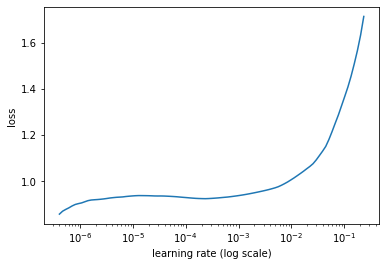

In [ ]:
# Visually identify best learning rate
learner.lr_plot()

**Train model**

In [ ]:
# Training using the 1cycle policy
learner.fit_onecycle(1e-7, 1)



begin training using onecycle policy with max lr of 1e-07...
134/134 [==============================] - 213s 1s/step - loss: 1.0348 - accuracy: 0.5487 - val_loss: 1.1072 - val_accuracy: 0.5550


**Evaluate/Inspect model**

In [ ]:
# Evaluate model
learner.validate(class_names = t.get_classes())

              precision    recall  f1-score   support

           1       0.74      0.83      0.78        47
           2       0.38      0.43      0.40        14
           3       0.19      0.25      0.21        20
           4       0.30      0.33      0.32        36
           5       0.77      0.59      0.67        83

    accuracy                           0.56       200
   macro avg       0.47      0.49      0.48       200
weighted avg       0.59      0.56      0.57       200



array([[39,  4,  2,  0,  2],
       [ 5,  6,  1,  2,  0],
       [ 4,  5,  5,  5,  1],
       [ 3,  0,  9, 12, 12],
       [ 2,  1, 10, 21, 49]])

From our classification report, we can observe that our model performs reasonably well on 1 and 5-star ratings and relatively bad on 2, 3 and 4-star ratings. 

**Split the train and test data**

In [ ]:
X = df['reviewtext']

In [ ]:
y = df['reviewstar']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)

**Text Regression - Ktrain**

**Preprocess data and build a transformer model**

In [ ]:
MODEL_NAME = 'roberta-base'

In [ ]:
t = text.Transformer(MODEL_NAME, maxlen = 500)

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Convert training set into a list
X_tr = pd.DataFrame(data = X_train, columns = ['reviewtext'])
X_tr = X_tr['reviewtext'].tolist()

In [ ]:
y_tr = pd.DataFrame(data = y_train, columns = ['reviewstar'])
y_tr = y_tr['reviewstar'].tolist()

In [ ]:
# Convert testing set into a list
X_te = pd.DataFrame(data = X_test, columns = ['reviewtext'])
X_te = X_te['reviewtext'].tolist()

In [ ]:
y_te = pd.DataFrame(data = y_test, columns = ['reviewstar'])
y_te = y_te['reviewstar'].tolist()

In [ ]:
# Pre-process training and testing sets
trn = t.preprocess_train(X_tr, y_tr)
val = t.preprocess_test(X_te, y_te)

preprocessing train...
language: en
train sequence lengths:
	mean : 18
	95percentile : 63
	99percentile : 109


/usr/local/lib/python3.7/dist-packages/ktrain/utils.py:607: UserWarning: Task is being treated as REGRESSION because either class_names argument was not supplied or is_regression=True. If this is incorrect, change accordingly.
  'either class_names argument was not supplied or is_regression=True. ' + \


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

preprocessing test...
language: en
test sequence lengths:
	mean : 19
	95percentile : 75
	99percentile : 113


In [ ]:
model = t.get_regression_model()

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

In [ ]:
learner = ktrain.get_learner(model, train_data = trn, val_data = val, batch_size = 6)

**Estimate a good learning rate**

In [ ]:
# Briefly simulate training to find good learning rate
learner.lr_find(max_epochs = 1) 

simulating training for different learning rates... this may take a few moments...
133/133 [==============================] - 176s 1s/step - loss: 677.5041 - mae: 8.9272


done.
Please invoke the Learner.lr_plot() method to visually inspect the loss plot to help identify the maximal learning rate associated with falling loss.


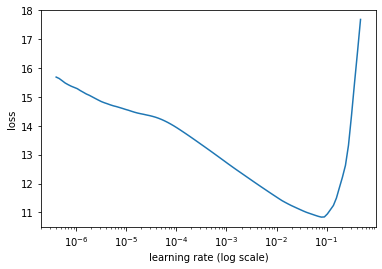

In [ ]:
learner.lr_plot()

**Train model**

In [ ]:
learner.fit_onecycle(1.9e-2, 1)



begin training using onecycle policy with max lr of 0.019...
134/134 [==============================] - 178s 1s/step - loss: 4.3339 - mae: 1.7272 - val_loss: 3.0028 - val_mae: 1.3738


**Evaluate/Inspect model**

Our MAE is roughly 1.4, which means our model's predictions are about 1.4 star rating off on average.

**Split the train and test data**

In [ ]:
X = df['clean_review']

In [ ]:
y = df['reviewstar']

In [ ]:
# Isolate X and y variables, and perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42, shuffle = True, stratify = y)

**Text Regression - Keras and TensorFlow** 

We will use a Keras/TensorFlow text model with word embeddings to make our predictions.

**Preprocessing text data**

ML models can’t make sense of text data. To feed them text data, we convert our text into sequences that be fed to the model. Keras provides a function for this very purpose. It creates a vocabulary of words and assigns each word an index that is used to represent the word in its sequence notation. Each sentence may not be the same length as the others. We pad them using Keras as our model expects each sentence to be of the same length.

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, BatchNormalization
from tensorflow.keras.layers import Bidirectional, LSTM
from tensorflow.keras.layers import RepeatVector, TimeDistributed
from keras.models import Model
from keras.layers.embeddings import Embedding
from keras.preprocessing.text import Tokenizer
from keras.layers import Input

In [ ]:
# Tokenize the training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [ ]:
# Get our training data word index
vocab_size = len(tokenizer.word_index) + 1 # Add 1 to account for unknown word

In [ ]:
print('Vocabulary size: {}'.format(vocab_size))

Vocabulary size: 1498


In [ ]:
# Encode training and testing data sentences into sequences
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)    

In [ ]:
# Get max training sequence length
max_length = max([len(x) for x in X_train])

In [ ]:
print('Max length of sentence: {}'.format(max_length))

Max length of sentence: 149


In [ ]:
# Pad the training and testing sequences
X_train = pad_sequences(X_train, maxlen = max_length, padding = 'post')
X_test = pad_sequences(X_test, maxlen = max_length, padding = 'post')

**Create the neural network**

The following script creates the model.

In [ ]:
# Create the neural network
input = Input(shape = (max_length,)) 
layer = Embedding(input_dim = vocab_size, output_dim = 128)(input)
layer = Flatten()(layer)
layer = Dense(24, activation = 'relu')(layer)
layer = Dropout(0.4)(layer)
layer = Dense(24, activation = 'relu')(layer)
layer = Dropout(0.3)(layer)
layer = Dense(24, activation = 'relu')(layer)
layer = Dropout(0.2)(layer)
layer = BatchNormalization()(layer)
output = Dense(1, activation = 'linear')(layer)
model = Model(inputs = input, outputs = output)

In [ ]:
from keras.callbacks import EarlyStopping

In [ ]:
callbacks = [EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 5, restore_best_weights = True)]

We add some dropout layers and callbacks to prevent overfitting.

**Compile the model**

Now we need to specify the loss function and the optimizer. It is done using compile function in keras.

In [ ]:
import tensorflow as tf
import keras

In [ ]:
# Compile the model
model.compile(loss = 'mae', optimizer = 'adam', metrics = [tf.keras.metrics.MeanAbsoluteError()])

We get the following output.

In [ ]:
print(model.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 149)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 149, 128)          191744    
_________________________________________________________________
flatten_1 (Flatten)          (None, 19072)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 24)                457752    
_________________________________________________________________
dropout_3 (Dropout)          (None, 24)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 24)                600       
_________________________________________________________________
dropout_4 (Dropout)          (None, 24)                0   

**Visualize the model**

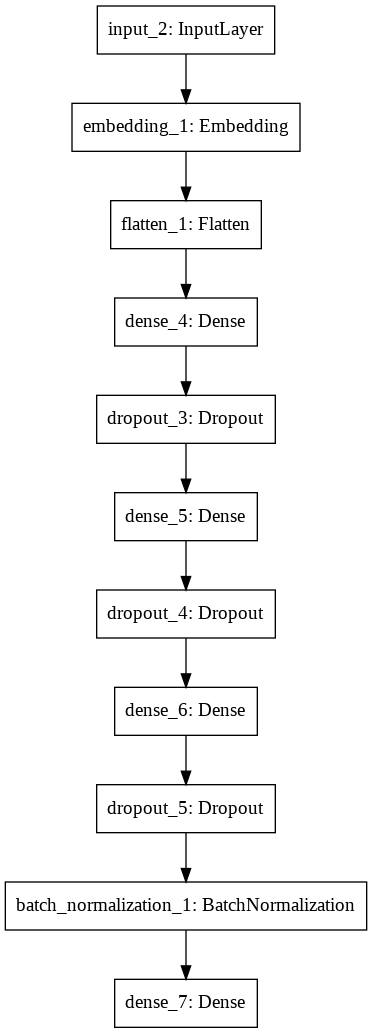

In [ ]:
tf.keras.utils.plot_model(model)

**Fit the model**

Training step is simple in keras. model.fit is used to train it.

In [ ]:
# Fit the model
history = model.fit(X_train, y_train, epochs = 50 , batch_size = 32, verbose = 1, validation_split = 0.10, callbacks = callbacks)

Epoch 1/50
26/26 [==============================] - 1s 15ms/step - loss: 3.4965 - mean_absolute_error: 3.4965 - val_loss: 3.3595 - val_mean_absolute_error: 3.3595
Epoch 2/50
26/26 [==============================] - 0s 8ms/step - loss: 3.2645 - mean_absolute_error: 3.2645 - val_loss: 3.1560 - val_mean_absolute_error: 3.1560
Epoch 3/50
26/26 [==============================] - 0s 9ms/step - loss: 3.0294 - mean_absolute_error: 3.0294 - val_loss: 2.9376 - val_mean_absolute_error: 2.9376
Epoch 4/50
26/26 [==============================] - 0s 10ms/step - loss: 2.8395 - mean_absolute_error: 2.8395 - val_loss: 2.5862 - val_mean_absolute_error: 2.5862
Epoch 5/50
26/26 [==============================] - 0s 9ms/step - loss: 2.5800 - mean_absolute_error: 2.5800 - val_loss: 2.4504 - val_mean_absolute_error: 2.4504
Epoch 6/50
26/26 [==============================] - 0s 8ms/step - loss: 2.4423 - mean_absolute_error: 2.4423 - val_loss: 2.2416 - val_mean_absolute_error: 2.2416
Epoch 7/50
26/26 [========

**Evaluate the results**

In [ ]:
# Evaluate the results
score, mean_squared_error  = model.evaluate(X_train, y_train, batch_size = 32, verbose = False)
print('Training Mean Squared Error:  {:.4f}'.format(mean_squared_error))

score, mean_squared_error  = model.evaluate(X_test, y_test, batch_size = 32, verbose = False)
print('Testing Mean Squared Error:  {:.4f}'.format(mean_squared_error))

Training Mean Squared Error:  1.3489
Testing Mean Squared Error:  1.3502


Our MAE is roughly 1.4, which means our model's predictions are about 1.4 star rating off on average.

**Visualize model training history**

Finally, let's plot the values for loss and mean squared error for both training and testing sets:

In [ ]:
import matplotlib.pyplot as plt

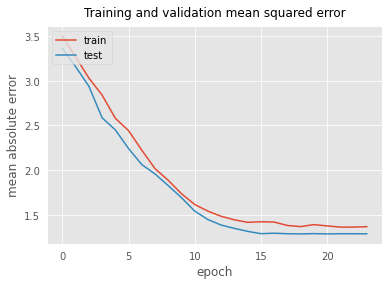

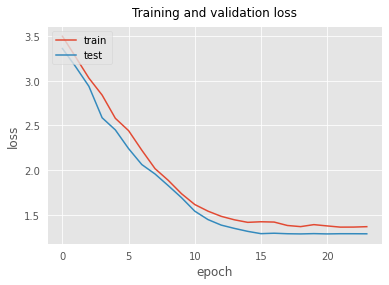

In [ ]:
plt.style.use('ggplot')

# Summarize history for mean squared error
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])

plt.title('Training and validation mean squared error', size = 12, pad = 10)
plt.ylabel('mean absolute error')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.tick_params(left = False, bottom = False)
plt.show()

# Summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Training and validation loss', size = 12, pad = 10)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.tick_params(left = False, bottom = False)
plt.show()

We can see the lines for both training and testing mean absolute errors and losses are pretty close to each other which means that the model is not overfitting.